In [8]:
import cvxpy
from utils_cvxpy import tv_denoising_dual, tv_denoising_primal
import numpy as np
import zarr
import matplotlib.pyplot as plt

### Load data

In [9]:
noisy_data = zarr.load("../data/denoising/noisy_shapes_seed_10_var_0.05.zarr")["noisy"]
alpha = 0.5

### Solve dual-TV using CVXpy

In [10]:
denoised_image_dual, q1, q2, obj_dual = tv_denoising_dual(noisy_data, alpha, verbose=False)

### Solve primal-TV using CVXpy

In [11]:
denoised_image_primal, obj_primal = tv_denoising_primal(noisy_data, alpha, verbose=False)

### Save to zarr

In [12]:
dd = zarr.open_group("results/tv_denoising_dual_shapes_alpha_{}.zarr".format(alpha))
dd["solution"] = [q1, q2]
dd["denoised"] = denoised_image_dual
dd["dual_objective"] = obj_dual

In [13]:
dd = zarr.open_group("results/tv_denoising_primal_shapes_alpha_{}.zarr".format(alpha))
dd["solution"] = denoised_image_primal
dd["objective"] = obj_primal

### Image Difference

Dual objective is -1468.8456805701226
Primal objective is 1468.845732833879


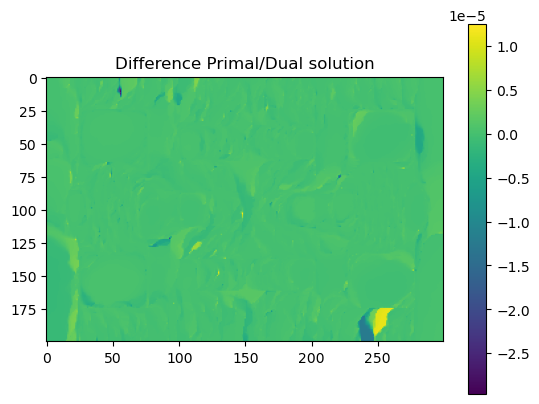

In [14]:
plt.figure()
plt.imshow(denoised_image_dual-denoised_image_primal)
plt.title("Difference Primal/Dual solution")
plt.colorbar()

print(f"Dual objective is {obj_dual}")
print(f"Primal objective is {obj_primal}")